# 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [113]:
df_train = pd.read_csv("train.csv")
print(df_train)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

# 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

79もの説明変数から、その住宅の販売価格を予想するためのデータセットです。
データの前処理や変数同士、変数と予想値との関係など、データサイエンスに必要な必須スキルを身に付けることができます。

# 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


・各特徴量がどういったものかを見る。（数値データか文字データなど）

・今回の目的変数はどの列か確認する。

・特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [114]:
# ラベルを表示して確認。
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [115]:
# 各列の型表示
pd.set_option('display.max_rows', 80)
print(df_train['RoofMatl'].dtypes)

object


In [116]:
# 今回の目的変数はどれか
print(df_train['SalePrice'])


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


### kaggleより以下を引用。
>Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

In [117]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。


・各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。


[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)


・欠損値が何パーセント含まれるかを確認する。

・5つ以上欠損値がある特徴量（列）は削除する。

・欠損値があるサンプル（行）は削除する。

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


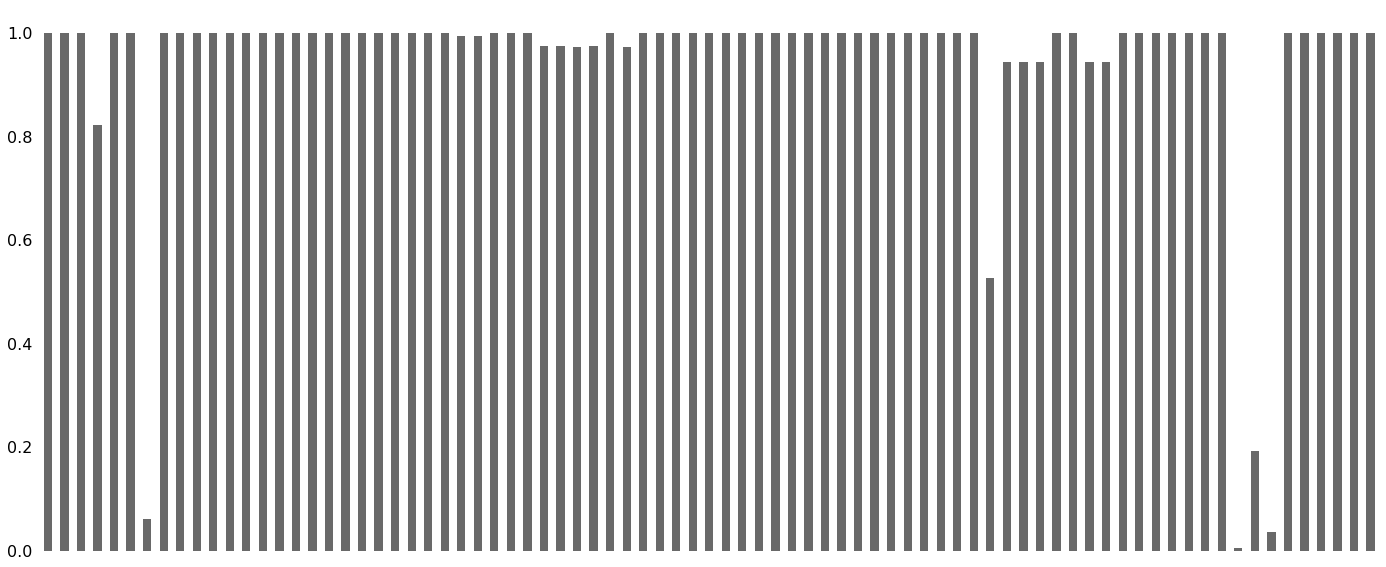

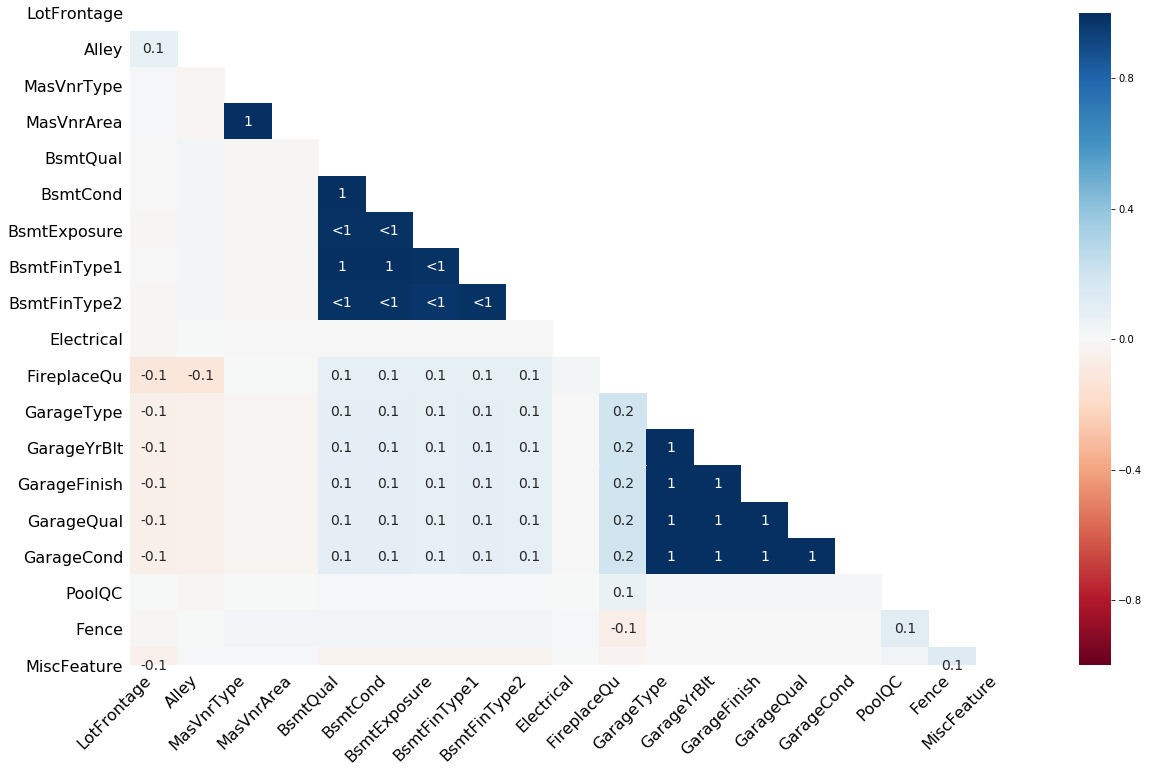

In [118]:
# 各特徴量の欠損値の有無を確認する。

import missingno as msno

train_null = df_train.isnull().sum()[df_train.isnull().sum()>0].sort_values()
print(train_null) # 欠損値のある列を抜き出し

msno.bar(df_train) # bar表示
msno.heatmap(df_train) # heatmap表示

#plt.figure(figsize=(16,20)) #サイズ調整
#sns.heatmap(df_train.isnull(), cbar=False); #ヒートマップ表示

In [119]:
# 欠損値が何パーセント含まれるかを確認する。

df_train.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.float).apply(lambda col: col/col.sum(), axis=0)
# True行が欠損率

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
False,1.0,1.0,1.0,0.822603,1.0,1.0,0.062329,1.0,1.0,1.0,...,1.0,0.004795,0.192466,0.036986,1.0,1.0,1.0,1.0,1.0,1.0
True,0.0,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,...,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
null_count = df_train.isnull().sum()
null_rate = null_count / len(df_train)

null_table = pd.DataFrame({
    'null_count': null_count,
    'missing_rate': null_rate
})

null_table.sort_values(by='missing_rate', ascending=False)

,null_count,missing_rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


In [137]:
# 5つ以上欠損値がある特徴量（列）は削除する。
df_train = df_train.dropna(axis=1)
print(df_train)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

In [138]:
# 欠損値があるサンプル（行）は削除する。
df = df_train.dropna(how='any') 
print(df)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

### 列で既にNaNを削除しているため、行には特に欠損値がない？

# 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。


・尖度

・歪度

### 尖度
>尖度（せんど、英: kurtosis)は、確率変数の確率密度関数や頻度分布の鋭さを表す指標である。正規分布と比べて、尖度が大きければ鋭いピークと長く太い裾をもった分布であり、尖度が小さければより丸みがかったピークと短く細い尾をもつ分布である。日本工業規格では、とがり (kurtosis) として平均値まわりの 4 次のモーメント μ4 の標準偏差 σ の 4 乗に対する比 μ4/σ4 と定義している

wikipediaより。

尖度が大ければ、正規分布と比べて<b>細く長いピークと長く太い裾野を持っている</b>。

### 歪度

>歪度（わいど、skewness）は、分布の非対称性を示す指標である。日本産業規格では、ゆがみ、ひずみ（歪み）を確率密度関数または確率関数 f (x) のグラフが左右対称でないこと、ゆがみの程度を平均値まわりの 3 次モーメント µ3 と標準偏差 σ の 3 乗との比 µ3/σ3 と定義している

同上。

歪度が x > 0、 x < 0 でそれぞれ分布が(正規分布と比較して)左右にずれていく。

ただし、 x = 0 であっても、そのままイコール正規分布というわけではない。


# 【問題6】分布の確認
・seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

・目的変数に対して対数変換を行う。

・対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

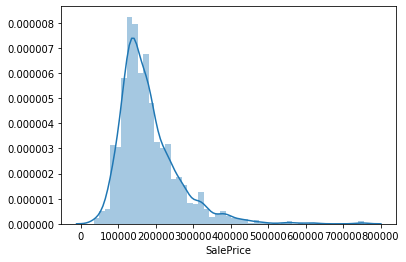

In [139]:
# seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

sns.distplot(df_train['SalePrice'])

In [160]:
# 目的変数に対して対数変換を行う。

# 歪度
skew = df_train['SalePrice'].skew()
# 尖度
kurtosis = df_train['SalePrice'].kurtosis()
print("歪度は : {}".format(skew))
print("尖度は : {}".format(kurtosis))

歪度は : 1.8828757597682129
尖度は : 6.536281860064529


変換後の歪度は : 0.12133506220520406
返還後の尖度は : 0.8095319958036296


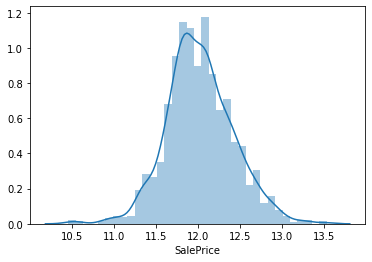

In [167]:
# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

df_log = np.log(df['SalePrice'])
#print(df_log)
sns.distplot(df_log)

# 歪度
skew = df_log.skew()
# 尖度
kurtosis = df_log.kurtosis()
print("変換後の歪度は : {}".format(skew))
print("返還後の尖度は : {}".format(kurtosis))

### 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

対数変換を行うと、尖度、歪度共に正規分布に近い状態となる。


# 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》


重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

In [180]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
corr_mat = df_train.corr(method='pearson')
print(corr_mat)

                     Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590  

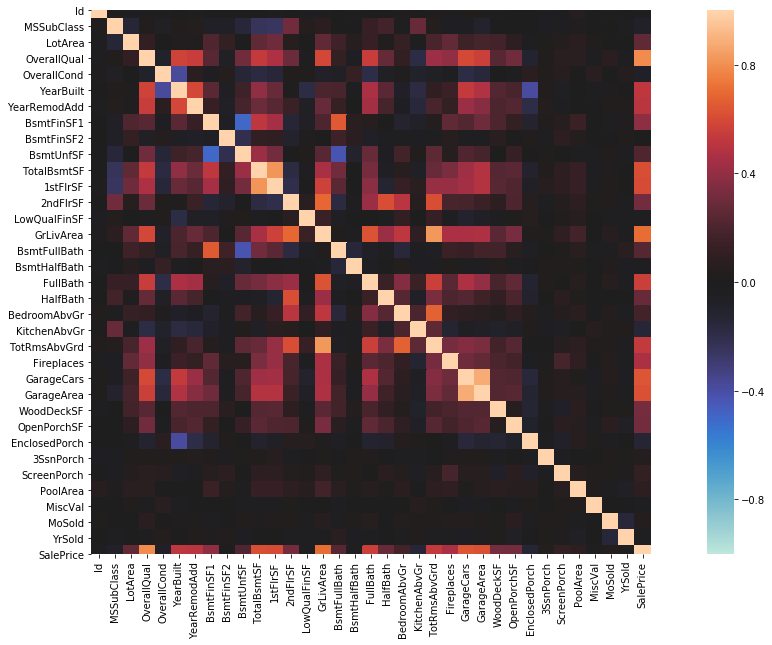

In [178]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_mat, square=True, vmax=1, vmin=-1, center=0) 

plt.show()  

目的変数との相関が大きいのはOverallQualに見える。GrLivAreaやGarageCarsなどのガレージ関係も相関がありそう。

In [205]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

df_s = corr_mat.sort_values(['SalePrice'], ascending=False)
print(df_s['SalePrice'].head(11))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


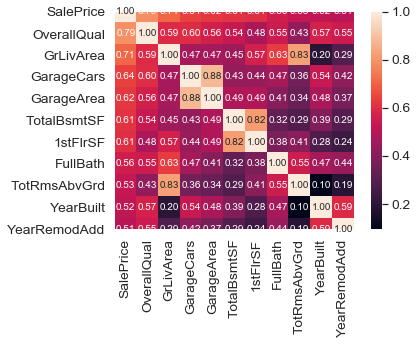

In [216]:
k = 11 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

OverallQual : 全体的な完成度

GrLivArea : 地上階の居住面積

GarageCars : ガレージに置ける車の数

GarageArea : ガレージの広さ

TotalBsmtSF : 地下階の居住面積

1stFlrSF : 1階部分の居住面積

FullBath : バスルームのグレード

TotRmsAbvGrd : 部屋数(バスルームを除く)

YearBuilt : 施工年

YearRemodAdd : リフォームした日(リフォーム歴が無ければYearBuiltと同じ)

### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

GarageCars : GarageArea
ガレージの広さ=置ける車の数なので、相関あり。

TotalBsmtSF : 1stFlrSF
ここにも一定の相関が見られる。

TotRmsAbvGrd : GrLivArea
部屋数が多ければ居住面積も大きいので相関あり。